# Codes python de la SAE Graphes
(ce fichier n'est pas dans le rendu final)

In [4]:
# les imports nécessaires
import json
import networkx as nx
import matplotlib.pyplot as plt

In [60]:
def nettoyageNoms(liste_noms):
    """fonction clarifiant les noms d'une liste d'une de noms, supprimant les caractères et informations inutiles

    Args:
        liste_noms (dict): liste de noms à nettoyer

    Returns:
        list : liste de noms sans caractères parasites 
    """
    nomsClairs = []
    for nom in liste_noms:
        sansCrochets = nom.replace('[', '').replace(']', '').replace("'", '')
        index = len(sansCrochets)
        if "(" in sansCrochets:
            index = min(index, sansCrochets.index("("))
        if "<" in sansCrochets:
            index = min(index, sansCrochets.index("<"))
        if "|" in sansCrochets:
            index = min(index, sansCrochets.index("|"))
        nomPropre = sansCrochets[:index]
        nomsClairs.append(nomPropre.strip())
    return nomsClairs

def extraction(filename):
    """fonction d'extraction des données d'un fichier contenant des informations lisibles par Python

    Args:
        filename (string): nom du fichier à lire

    Returns:
        dict : dictionnaire avec un nom de film en clé et son casting (liste de noms) en valeur
    """
    dico = {}
    with open(filename, 'r') as file:
        for ligne in file.readlines():
            ligneConvertie = json.loads(ligne)
            if ligneConvertie["cast"] :
                dico[ligneConvertie["title"]] = nettoyageNoms(ligneConvertie["cast"])
    return dico

def construction(donnees):
    """fonction de construction d'un graphe en fonction des données d'un dicionnaire

    Args:
        donnees (dict): dictionnaire avec un nom de film en clé et son casting (liste de noms) en valeur

    Returns:
        graph: graphe reliant les informationns du dictionnaire placé en paramètre
    """
    graphe = nx.Graph()
    for casting in donnees.values():
        for acteurI in casting:
            for acteurII in casting:
                if acteurI != acteurII:
                    graphe.add_edge(acteurI, acteurII)
    return graphe

def display(G):
    """fonction d'affichage d'un graphique afin de le voir visuellement

    Args:
        G (graph): graphe sur lequel se base l'image renvoyée
    """
    options = {
    'with_labels': True,
    'node_size': 3000,
    'node_color': "skyblue",
    'node_shape': "o",
    'alpha': 0.7, 
    'linewidths': 2,
    }
    nx.draw(G, **options)

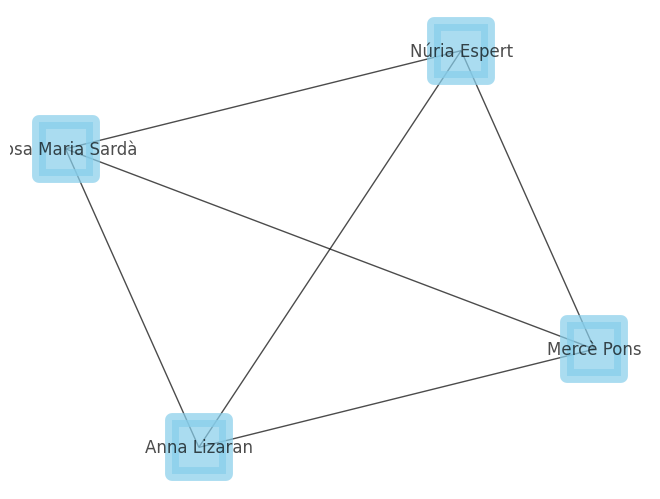

In [3]:
globalData = extraction("data.json")

graphe = construction(globalData)

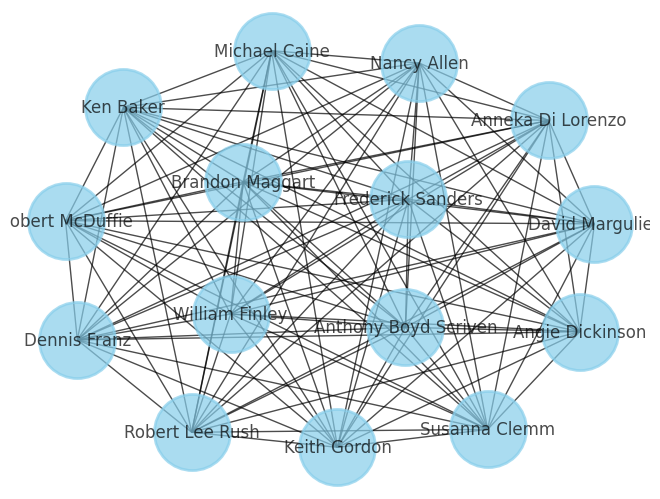

In [61]:
smallData = {"Dressed to Kill (1980 film)": ['Michael Caine', 'Angie Dickinson', 'Nancy Allen', 'Keith Gordon', 'Dennis Franz', 'David Margulies', 'Ken Baker', 'Susanna Clemm', 'Brandon Maggart', 'Anneka Di Lorenzo', 'William Finley', 'Robert Lee Rush', 'Anthony Boyd Scriven', 'Robert McDuffie', 'Frederick Sanders']}
smallGraph = construction(smallData)
display(smallGraph)

Echauffement fini !

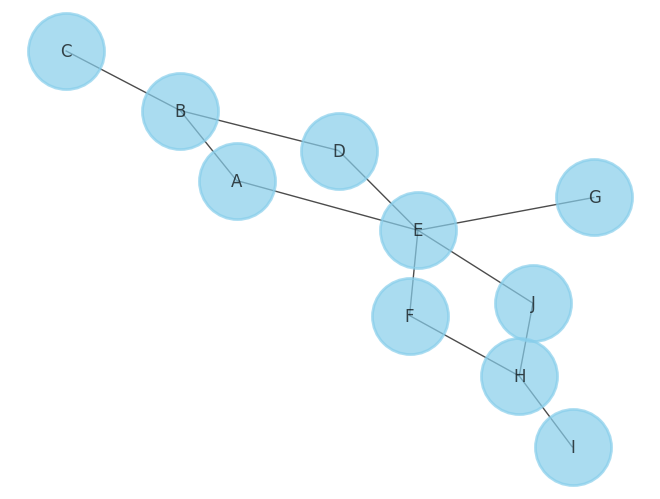

In [56]:
G = nx.Graph()
G.add_edges_from([("A", "B"), ("C", "B"), ("B", "D"), ("D", "E"), ("E", 'F'), ("F", "H"), ("H", "I"), ("H", "J"), ("E", "G"), ("E", "A"), ("E", "J")])
display(G)

In [8]:
def collaborateursCommuns(G, acteurI, acteurII):
    """fonction de recherche déterminants quels sont les artistes ayant collaboré avec les deux acteurs en paramètre

    Args:
        acteurI (string): acteur
        acteurII (string): acteur

    Returns:
        set: liste des noms des acteurs ayant déjà travaillé avec les deux acteurs placés en paramètre 
    """
    if acteurI not in G.nodes:
        print(acteurI,"est un illustre inconnu")
        return None
    if acteurII not in G.nodes:
        print(acteurII,"est un illustre inconnu")
        return None
    collaborateurs_en_commun = set()
    for collaborateur in G[acteurI]:
        if collaborateur in G[acteurII]:
            collaborateurs_en_commun.add(collaborateur)
    return collaborateurs_en_commun

In [7]:
print(collaborateursCommuns(graphe, 'Núria Espert', 'Rosa Maria Sardà'))
print(collaborateursCommuns(graphe, "Emma Watson", "Dany Boon"))
print(collaborateursCommuns(graphe, "Igor", "Louis de Funès"))

{'Xabier Elorriaga', 'Montserrat Salvador', 'Mercè Pons', 'Anna Lizaran'}
{'Daniel Brühl', 'Luke Evans'}
Igor est un illustre inconnu
None


### 3 - Collaborateurs proches

In [9]:
#code fourni par les professeurs

def collaborateurs_proches(G,u,k):
    """Fonction renvoyant l'ensemble des acteurs à distance au plus k de l'acteur u dans le graphe G. La fonction renvoie None si u est absent du graphe.
    
    Parametres:
        G (graph): le graphe
        u (string): le sommet de départ
        k (int): la distance depuis u
    """
    if u not in G.nodes:
        print(u,"est un illustre inconnu")
        return None
    collaborateurs = set()
    collaborateurs.add(u)
    #print(collaborateurs)
    for i in range(k):
        collaborateurs_directs = set()
        for c in collaborateurs:
            for voisin in G.adj[c]:
                if voisin not in collaborateurs:
                    collaborateurs_directs.add(voisin)
        collaborateurs = collaborateurs.union(collaborateurs_directs)
    return collaborateurs

In [12]:
print(collaborateurs_proches(graphe,"Mahdi Chaouch", 2))

{'Suzanne Comte', 'Vincent Grass', 'Roger Blin', 'José Luis López Vázquez', 'Rafael Alcántara', 'Enrique Lesmes', 'Serge Ubrette', 'Gaby Morlay', 'Noël Roquevert', 'François Périer', 'Javier Armet', 'Jean Dasté', 'Gérard Depardieu', 'Zarra', 'Simone Delamare', 'Anouk Ferjac', 'José Calvo', 'Ángela Molina', 'Tete Montoliu', 'Corinne Dacla', 'Didier Bénureau', 'André Gabriello', 'Michel Bedetti', 'Laurent Gamelon', 'Hubert Noël', 'Guy Bedos', 'Manuel Arbó', 'Luis Parellada', 'Jacques Marin', 'Gabriel Alonso', 'Mahdi Chaouch', 'Carmen Lombarte', 'Jacques Charby', 'Alain MacMoy', 'Jeanne Moreau', 'Christiane Barry', 'Félix de Pomés', 'María Victoria Durá', 'Joaquín Bergía', 'Claude Nollier', 'Francisco Javier Marcet', 'Fernández', 'Georges Wilson', 'Claude Vernier', 'Josep Maria Angelat', 'Ludovic Lutard\t...', 'Pierre Fabre\t...', 'Roger Rafal', 'Pascale Christophe', 'Jean Carmet', 'Jean Debucourt', 'Sady Rebbot', 'Miguel', 'Puchades', 'Ramsay Ames', 'Víctor García', 'Dominique Laffin', '

### 4 - Qui est au centre d'Hollywood ?

In [16]:
def distance_entre_acteurs(G, acteurI, acteurII):
    """fonction déterminant le nombre d'arêtes séparant deux acteurs dans un graphe donné

    Args:
        G (graph): graphe des acteurs
        acteurI (str): nom de l'acteur de départ
        acteurII (str): nom de l'acteur d'arrivée

    Returns:
        int: distance séparant les deux acteurs
    """
    if acteurI == acteurII:
        return 0
    file =[(acteurI, [acteurI])]
    chemins = []
    while file:
        sommet, chemin = file.pop(0)
        for voisin in G[sommet]:
            if voisin not in chemin:
                if voisin == acteurII:
                    chemins.append(chemin + [voisin])
                else:
                    file.append((voisin, chemin + [voisin]))
    return len(chemins[0]) -1

def centralite(G, acteur):
    """fonction déterminant la distance entre un acteur et l'acteur le plus éloigné de lui d'un graphe donné

    Args:
        G (graph): graphe des acteurs
        acteur (str) : nom de l'acteur dont on veut déterminer la centralité

    Returns:
        int : centralité de l'acteur
    """
    return distance_entre_acteurs(G, acteur, max(G.nodes, key= lambda node: distance_entre_acteurs(G, acteur, node)))

def le_plus_centrale(G):
    """fonction déterminant l'acteur le plus centrale d'un graphe donné

    Args:
        G (graph): graphe des acteurs

    Returns:
        str: nom de l'acteur le plus centrale
    """
    centralites = {acteur: centralite(G, acteur) for acteur in G.nodes}
    return min(centralites, key =lambda acteur : centralites[acteur])

In [13]:
print("distance A - I :",distance_entre_acteurs(G, "A", "I"))
print()
print("centralité de E :", centralite(G, 'E'))
print("centralité de H :", centralite(G, 'H'))
print()
print('Le plus centrale :', le_plus_centrale(G))

distance A - I : 4

centralité de E : 3
centralité de H : 5

Le plus centrale : E


### 5 - Une petite famille

In [104]:
def distance_maximum(G):
    """fonction déterminant la distance séparant les deux neouds les plus éloignés d'un graphe donné

    Args:
        G (graph): le graphe

    Returns:
        int: distance maximum entre deux ne
    """
    distances = []
    for acteur in G.nodes:
        collaborateurs = {acteur}
        i = 0
        while i < len(G.nodes) and len(collaborateurs) < len(G.nodes):
            collaborateurs_directs = set()
            for c in collaborateurs:
                for voisin in G.adj[c]:
                    if voisin not in collaborateurs:
                        collaborateurs_directs.add(voisin)
            collaborateurs = collaborateurs.union(collaborateurs_directs)
            i+= 1
        distances.append(i)
    return max(distances)

In [105]:
print("distance maximum de G :",distance_maximum(G))
print("distance maximum de smallGraph :",distance_maximum(smallGraph))

distance maximum de G : 6
distance maximum de smallGraph : 1
